# 3002 Unit 1 Final Project

**Group 6** : *Daniel Kim, Madeline Tibaldi, Jifei Xiao, Logan Knight, Lekha Koganti*


# LIF Neuron

### Description
The leaky integrate and fire (LIF) neuronal model is used to model the firing of biological neurons and is based off of the principle that input (current) is spatially and temporally integrated through an integrator (representing pores and leaky channels in the biological neuron), followed by the generation of action potentials through a spike generator (representing axon initial segment) to generate an output (voltage or membrane potential). The model of the neuron as an equivalent circuit applies the LIF model as explained below.

Specifically, the input is the current provided by the flow of ions across the neuronal membrane through pores or leaky channels (primarily leaky K+ channel) that act as resistors or conductors. The resting membrane potential is represented by a battery in the circuit. This ion flow results in the production of graded potentials at dendrites and is summed at the soma, where integration takes place. The subsequent change of voltage from resting membrane potential due to graded potentials is dependent on current and capacitance and can be mathematically represented by Vm=1/C integrated over Ie(dt) . Voltage can also be mathematically represented as V(m) = V -dV/dt, illustrating the dependence on resistance and capacitance (where  represents the time constant and is the product of capacitance and leak resistance). In this model, capacitance represents the cell membrane.

If this current causes enough depolarization for membrane potential to rise above the threshold value, an action potential or firing at the axon initial segment is generated as part of the spike generator. The ensuing change in voltage or membrane potential is then transmitted as information to the subsequent neuron through the process of synaptic transmission and chemical transduction into graded signals, repeating the process again. 

One aspect of the biological neuron that is missing in this model is voltage gated ion sodium channels. These channels open in response to crossing of the threshold potential and are responsible for the upwards, “spike” portion of the action potential.

The below code and visualization demonstrates that when the integrated input causes membrane potential to cross threshold, a spike is generated.

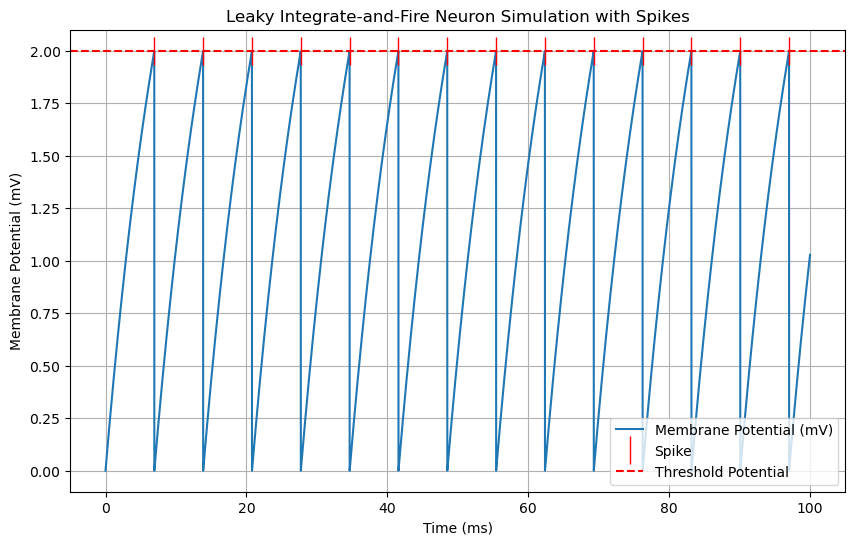

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
R = 1.       # Membrane resistance (kΩ)
C = 10.      # Membrane capacitance (µF)
tau = R * C  # Membrane time constant (ms)
V_th = 2.    # Threshold potential (mV) 
V_reset = 0. # Reset potential (mV)
V_init = 0.  # Initial potential (mV)
I_in = 4.    # Input current (µA) 

# Simulation settings
dt = 0.01    # Time step (ms)
t_max = 100  # Maximum simulation time (ms)

# Initialize arrays
t = np.arange(0, t_max, dt)
V = np.zeros_like(t)
V[0] = V_init

# Simulation
spike_times = []
for i in range(1, len(t)):
    dVdt = (-V[i-1] + R*I_in) / tau
    V[i] = V[i-1] + dVdt * dt
    if V[i] >= V_th:
        V[i] = V_reset
        spike_times.append(t[i])  # Record spike time

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, V, label='Membrane Potential (mV)')
plt.plot(spike_times, np.ones_like(spike_times) * V_th, '|', color='r', markersize=20, label='Spike')
plt.axhline(y=V_th, color='r', linestyle='--', label='Threshold Potential')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Leaky Integrate-and-Fire Neuron Simulation with Spikes')
plt.legend()
plt.grid(True)
plt.show()

# LIF Neuron with Voltage Gated Na+ Channels

### Description

This model extends the basic LIF neuron by incorporating voltage-gated sodium channels, which play a crucial role in neuronal spiking behavior. Specifically, voltage gated sodium channels allow for the influx of sodium ions into the neuronal soma, which is responsible for the rapid depolarization of the membrane potential during action potential generation. In other words, these channels contribute ot the rising phase of the action potential. 

In the code and visualization below, spikes are not presented because we could not code for an input current greater than 20 mV. Therefore, although the membrane potential was depolarized form -70mV (resting potential) to -50 mV, a spike could not be generated because the threshold was only met but never crossed. However, this visualization does show us that the opening of sodium channels from 50 to 100 mV in this case caused a depolarization of 20 mV.

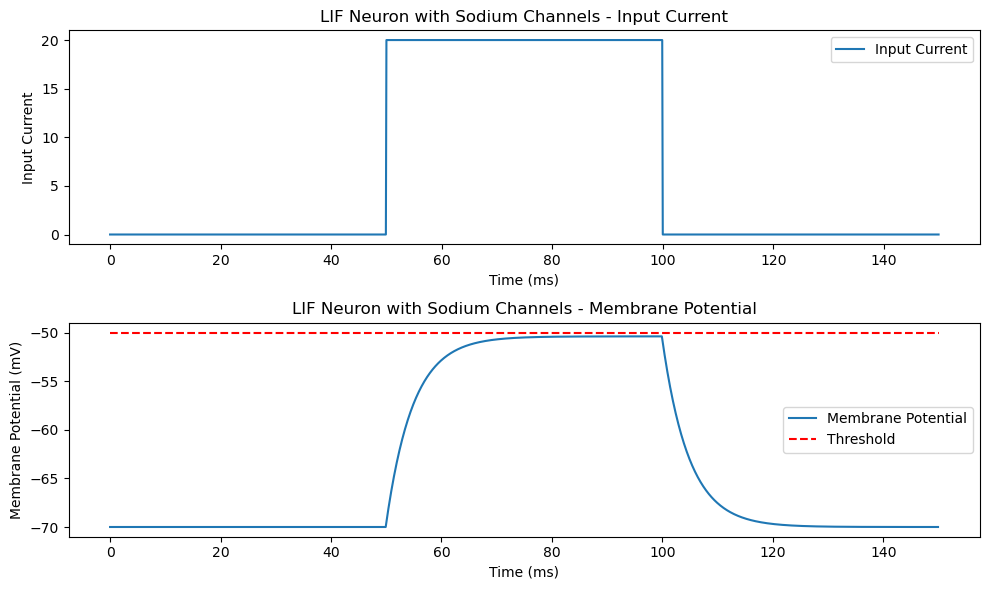

In [11]:
import numpy as np
import matplotlib.pyplot as plt

class LifNeuron:
    def __init__(self, tau, R, threshold, resting_potential, refractory_period, sodium_channel_density):
        self.tau = tau  # membrane time constant in ms
        self.R = R  # membrane resistance in Ohms
        self.threshold = threshold  # firing threshold in mV
        self.resting_potential = resting_potential  # resting membrane potential in mV
        self.refractory_period = refractory_period  # refractory period in ms
        self.sodium_channel_density = sodium_channel_density  # density of sodium channel
        self.membrane_potential = self.resting_potential
        self.last_spike_time = -float('inf')  # initialize last spike time to negative infinity

    def sodium_channel_current(self, membrane_potential):
        return self.sodium_channel_density * (membrane_potential - self.resting_potential)

    def integrate_and_fire(self, input_current, dt, time):
        if time - self.last_spike_time >= self.refractory_period:
            delta_v = (input_current - (self.membrane_potential - self.resting_potential) / self.R
                       - self.sodium_channel_current(self.membrane_potential)) * dt / self.tau
            self.membrane_potential += delta_v

            if self.membrane_potential >= self.threshold:
                self.last_spike_time = time
                self.membrane_potential = self.resting_potential

    def simulate(self, input_currents, dt):
        time = np.arange(0, len(input_currents) * dt, dt)
        for i, current in enumerate(input_currents):
            self.integrate_and_fire(current, dt, time[i])

    def plot_results(self, input_currents, dt):
        time = np.arange(0, len(input_currents) * dt, dt)
        membrane_potential_trace = []
        for i, current in enumerate(input_currents):
            self.integrate_and_fire(current, dt, time[i])
            membrane_potential_trace.append(self.membrane_potential)

        plt.figure(figsize=(10, 6))
        plt.subplot(2, 1, 1)
        plt.plot(time, input_currents, label='Input Current')
        plt.title('LIF Neuron with Sodium Channels - Input Current')
        plt.xlabel('Time (ms)')
        plt.ylabel('Input Current')
        plt.legend()

        plt.subplot(2, 1, 2)
        plt.plot(time, membrane_potential_trace, label='Membrane Potential')
        plt.plot([0, len(input_currents) * dt], [self.threshold, self.threshold], 'r--', label='Threshold')
        plt.title('LIF Neuron with Sodium Channels - Membrane Potential')
        plt.xlabel('Time (ms)')
        plt.ylabel('Membrane Potential (mV)')
        plt.legend()

        plt.tight_layout()
        plt.show()

# Simulation parameters
TAU = 5  # membrane time constant in ms
R = 1  # membrane resistance in Ohms
THRESHOLD = -50  # firing threshold in mV
RESTING_POTENTIAL = -70  # resting membrane potential in mV
REFRACTORY_PERIOD = 5  # refractory period in ms
SODIUM_CHANNEL_DENSITY = 0.02  # density of sodium channel
DT = 0.1  # time step in ms

# Input current
input_currents = np.concatenate([np.zeros(500), np.ones(500) * 20, np.zeros(500)])

# Create LIF neuron
neuron = LifNeuron(TAU, R, THRESHOLD, RESTING_POTENTIAL, REFRACTORY_PERIOD, SODIUM_CHANNEL_DENSITY)

# Simulate neuron response
neuron.simulate(input_currents, DT)

# Plot results
neuron.plot_results(input_currents, DT)

# Simple Neural Network - Feedforward

### Description

A feedforward neural network is a fundamental architecture where information flows in one direction, from input nodes through hidden layers to output nodes. Each node applies a weighted sum of inputs followed by a non-linear activation function. As the name suggests, the input nodes are responsible for receiving binary inputs. The hidden layers of the network apply a weighted sum of inputs followed by a non-linear activation function for integration of the inputs, where the output of each previous hidden layer becomes the input for the next layer. The output from the overall network is once again binary after computation in the hidden layers. 

The visualization demonstrates the changing membrane potential of each neuron over time as it integrates each of its various inputs. Taking neuron 3 as an example, the integration of inputs around 30 ms causes the membrane potential to cross threshold potential and would generate a spike.

Input Spikes:
Input 1: 01111101110010111101111011110101001011111010110100
Input 2: 10110100110001000010110000010110010100010010011111
Input 3: 01111110011101010011110001011100000100110110110110
Input 4: 01100010101001010011001001010111110001101100110100
Input 5: 10011001010000001011010111110011111111111001101000


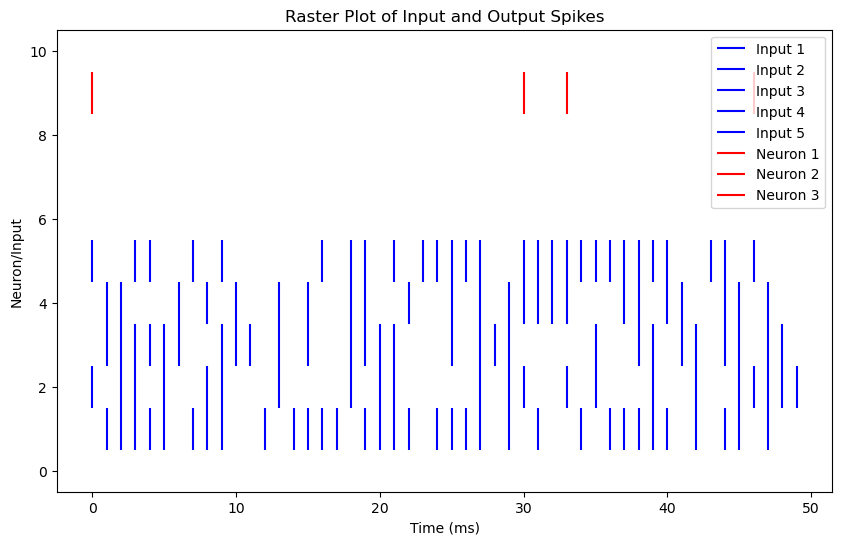

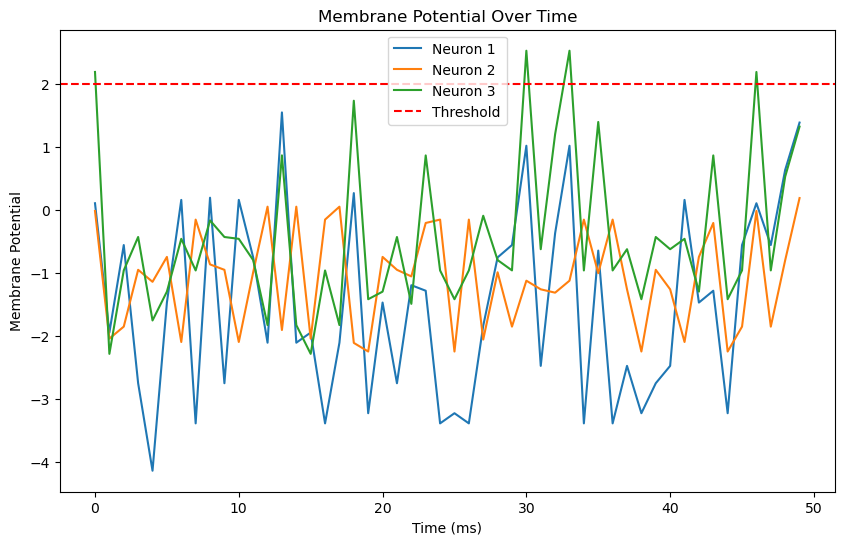

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
num_inputs = 5
num_neurons = 3
time_steps = 50  # in milliseconds
threshold = 2  # Threshold for firing

# Generate random input spikes (0 or 1) for each input source
input_spikes = np.random.randint(0, 2, size=(num_inputs, time_steps))

# Print input spikes
print("Input Spikes:")
for i in range(num_inputs):
    print(f"Input {i+1}: {''.join(map(str, input_spikes[i]))}")

# Generate weights for each neuron (random for simplicity)
weights = np.random.randn(num_inputs, num_neurons)

# Simulate membrane potential dynamics and firing of neurons
membrane_potentials = np.zeros((num_neurons, time_steps))
output_spikes = np.zeros((num_neurons, time_steps))

for t in range(time_steps):
    # Compute input current for each neuron based on input spikes and weights
    input_current = np.dot(input_spikes[:, t], weights)

    # Update membrane potential of each neuron
    membrane_potentials[:, t] = input_current

    # Check if membrane potential crosses threshold and fire neuron accordingly
    output_spikes[:, t] = np.where(membrane_potentials[:, t] >= threshold, 1, 0)

# Plot raster plot for input spikes
plt.figure(figsize=(10, 6))
for i in range(num_inputs):
    plt.eventplot([t for t in range(time_steps) if input_spikes[i, t] == 1], lineoffsets=i+1, colors='blue', label=f'Input {i+1}')

# Plot raster plot for output spikes from each neuron
for i in range(num_neurons):
    plt.eventplot([t for t in range(time_steps) if output_spikes[i, t] == 1], lineoffsets=num_inputs+i+2, colors='red', label=f'Neuron {i+1}')

plt.title('Raster Plot of Input and Output Spikes')
plt.xlabel('Time (ms)')
plt.ylabel('Neuron/Input')
plt.legend()
plt.show()

# Plot membrane potential and threshold
plt.figure(figsize=(10, 6))
for i in range(num_neurons):
    plt.plot(range(time_steps), membrane_potentials[i, :], label=f'Neuron {i+1}')

plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.title('Membrane Potential Over Time')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential')
plt.legend()
plt.show()

# Comparison & Evaluation of Models

### LIF Neuron
**Benefits**: 
- Simplistic and efficient model of neuronal circuitry.
- Includes features of integration and spike generation. 

**Limitations**: 
- Does not include voltage gated sodium channels, decreasing biologial plausibility
- Cannot model complex firing patterns (such as bursting), adaptation, synaptic plasticity, or other more complex phenomenon.

### LIF Neuron with Voltage Gated Na+ Channels
**Benefits**: 
- More biophysically realistic compared to the basic LIF model.
- Captures the fast depolarization phase of action potentials.

**Limitations**: 
- Still a simplified representation of real neuronal behavior.
- May require more computational resources due to additional complexity.

### Simple Neural Network - Foodforward
**Benefits**: 
- Versatile and powerful for various tasks including classification, regression, and pattern recognition.
- Can learn complex mappings from input to output.
- Scalable and can be trained efficiently with large datasets using optimization algorithms like backpropagation.

**Limitations**: 
- Lack of feedback connections may limit its ability to model dynamic processes or sequential data effectively.
- May require large amounts of data for training, especially for deeper architectures.

### Evaluation of Usefulness of Models
The LIF neuron models (basic and with sodium channels) are simpler and more biophysically constrained compared to the feedforward neural network. They capture specific aspects of neuronal behavior but lack the versatility and learning capabilities of neural networks. Additionally, the LIF models have fewer parameters and are more concise, but they also have less complexity and may not capture all aspects of neural dynamics. The feedforward neural network is more general-purpose and can learn complex mappings from input to output. It contains more information due to its larger parameter space and ability to model intricate relationships in data. Each model serves different purposes: the LIF neurons are suitable for simulating single neuron behavior and basic neural networks, while feedforward neural networks are better suited for tasks involving pattern recognition, classification, and regression.

### Application of Information Theory to Models

Information theory dictates a linear relationship between the complexity of a code and bits, or the measure of information contained in the code. The complexity of the information contained within each of the three codes above can be related to the number of components in the model. The addition of voltage-gated sodium channels adds complexity to the model, increasing its information content and therefore bits compared to the basic LIF neuron. Adding VG Na+ channels is akin to retaining NMDA receptors in an ANN, which requires an increased number of hidden layers and therefore greater complexity in the model. However, it remains relatively concise compared to more detailed biophysical models.

Feedforward neural networks can contain a significant amount of information or bits, especially in deeper architectures with many parameters. They can learn complex representations from data, potentially capturing intricate patterns and relationships. However, it will be more concise compared to LIF neurons and LIF neurons with VG Na+ channels as feedforward neural networks do not include a spike generator in their model. Instead, feedforward neural networks only include binary inputs, an integrator, and a binary output. 


# Updating Inputs of Simple Feedforward Neuronal Network

We updated the input for a simple neural network by running the code with randomized inputs as well as running the code for a model that could go to threshold and one that would not go to threshold. In these different outputs we can see a large change in the raster plots as the output that does not reach threshold shows less data and inputs while the one that does shows data at all of the input points. This is due to the inputs having a greater sum and allowing outputs to be seen, while the other code has inputs that are unable to sum to the threshold or have enough sum to produce as many outputs. We can mainly see these differences in threshold in the ‘Membrane Potential Over Time’ graph where in the first graph we can see the inputs reach the red line representing threshold and the second graph is unable to produce outputs that reach this boundary. 

**Changes in Code**

*input_spikes = np.zeros((num_inputs, time_steps))*

*for i in range(num_inputs):*

    *spike_times = np.random.choice(time_steps, np.random.randint(0, threshold), replace=False)*
    
    *input_spikes[i, spike_times] = 1*

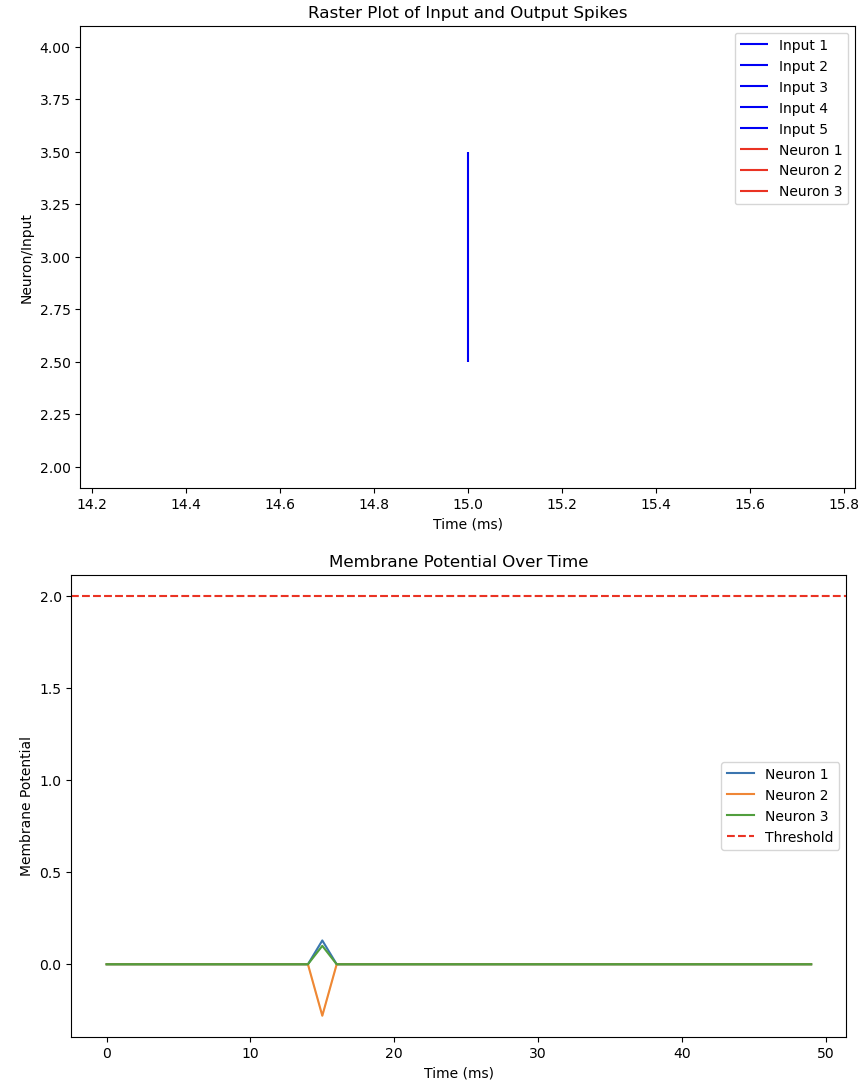



# Updating Inhibition of LIF Neuron

We updated the model of the leaky integrate and fire neuron but with the addition of an inhibitory input. As seen in the bottom graphical output, adding the inhibition to the action potential simulation through the code below results in fewer action potentials over time compared to the same model without inhibition (shown with the top graph). The change in voltage over time equals the summation of the original excitatory input and the inhibitory input, as in actual neurons.

**Changes in Code**

*I_inh = 2.   # Inhibitory input current (µA)*

*tau_inh = 20. # Time constant for inhibitory input (ms)*


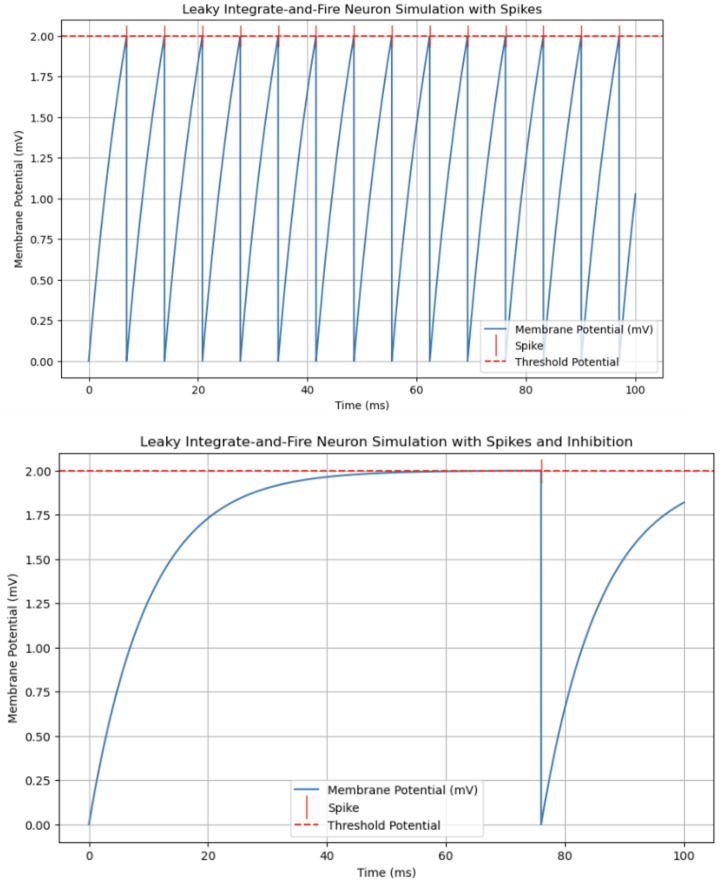

# Topic Discussion: Artificial Intelligence

Artificial Intelligence (abbreviated AI) is a general term that describes a computer system simulating human intelligence. While there is a lot of modern day discussion and usage of AI, the concept behind AI has been around for decades, but has evolved greatly since. Early AI was used in problem solving and symbolic contexts. Scientists like Alan Turing, John McCarthy, Claude Shannon, and many more were names that did important research in the field. As time has progressed, AI has been used for problem reasoning, mapping projects, personal assistant devices, and much more.

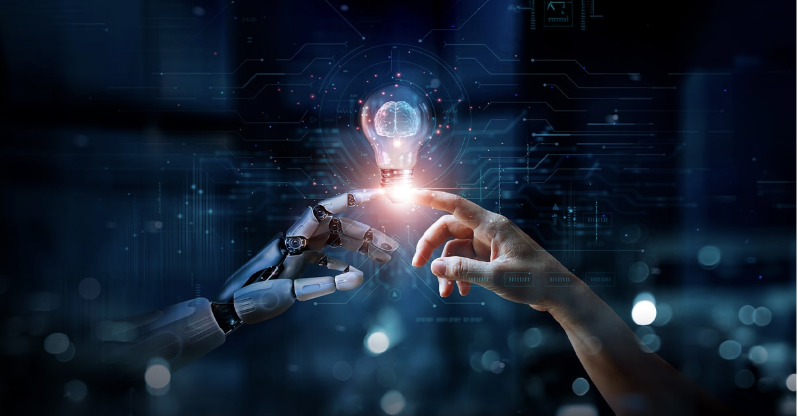

There are different types of artificial intelligence with different levels of complexity and independence from human processes. Machine Learning is a type of AI that involves a computer to learn to complete a task without needing direct instruction from a human. There are five steps to machine learning involving getting data, cleaning data, training the model, testing the model, and improving the model. A machine learning model can take in input, use statistical models to make inferences from the data, and produce an output. 

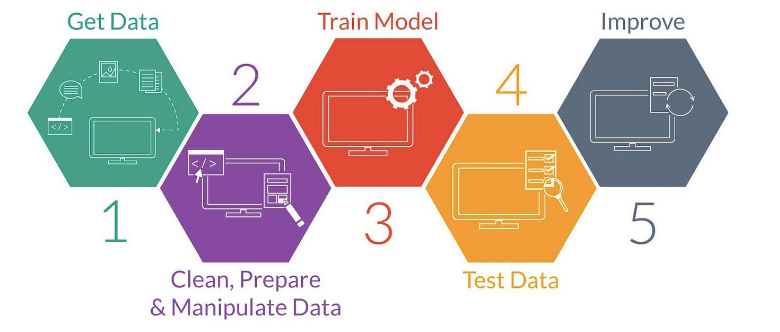

Another type of AI is artificial neural networks (ANNs). More complex than machine learning, ANNs are modeled after the human brain. They use artificial interconnected “nodes” that mimic the behavior of neurons to process data. ANNs are more independent from humans than machine learning and can extract features during testing.

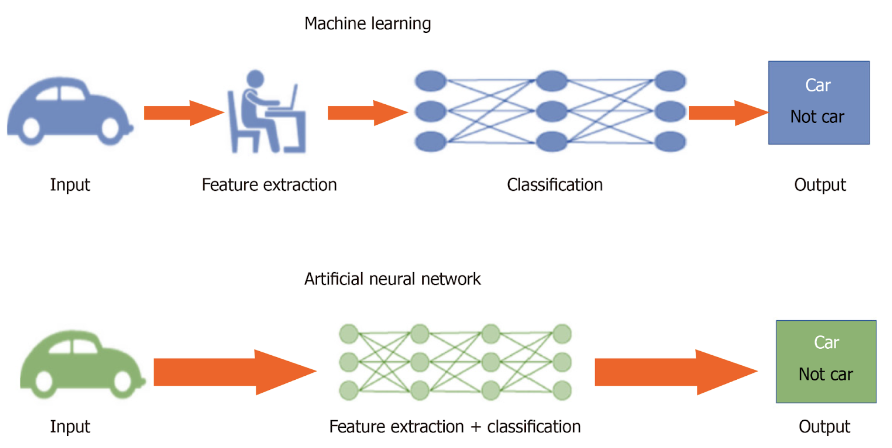

Lastly, deep neural networks (DNNs) are very similar to ANNs but involve more “hidden layers” of nodes and are capable of more complicated processes.

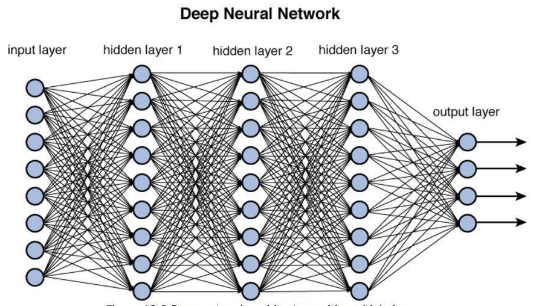

AI is all around us in the modern world. Devices like Amazon’s Alexa and Apple’s Siri are found in many homes, and use AI to respond to voice commands, processing language and performing a wide variety of tasks in response. Another common use of modern AI is the website ChatGPT. ChatGPT uses AI to respond to text input from users, producing very creative and informative results. It can mimic human-like conversation. Some car companies like Tesla are developing cars that use AI for navigation, obstacle detection, and other relevant tasks. AI is also being widely applied in the field of healthcare to improve imaging analysis, disease diagnosis, patient monitoring, and much more. Streaming platforms like Netflix and music platforms like Spotify use AI to improve their recommendation systems to better market to their customers. 

You can try out AI yourself using ChatGPT! https://chat.openai.com/ 

**Read more about Artificial Intelligence here!**

What is Artificial Intelligence? https://www.ibm.com/topics/artificial-intelligence 

Artificial Intelligence: What it is and why it matters https://www.sas.com/en_us/insights/analytics/what-is-artificial-intelligence.html 

